## IMPORTING LIBRARIES

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df =pd.read_csv("student_score.csv")


In [168]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [169]:
df.shape

(30641, 15)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [171]:
# removing the first Unnamed index column
df=df.iloc[: , 1:]

In [172]:
df.shape

(30641, 14)

In [173]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [174]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [175]:
pd.isnull(df).sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# DATA VISUALISATION and ANALYSIS

## Gender Distribution

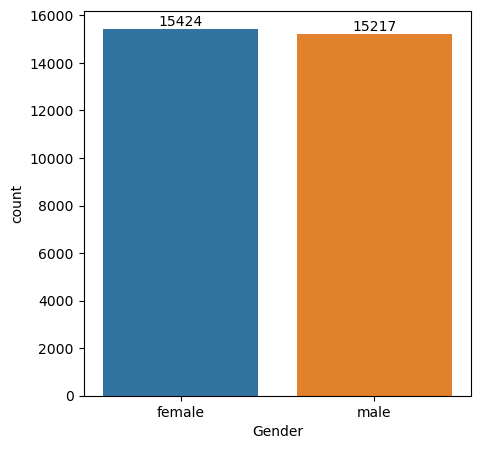

In [176]:
plt.figure(figsize=(5,5))
x= sns.countplot(data=df,x="Gender" )
x.bar_label(x.containers[0])

plt.show()



The above chart depicts that there are more female students in the dataset compared to male students. This suggests that the number of female students exceeds the number of male students in the data.

In [177]:
k=df.groupby("ParentEduc").agg({"MathScore" :'mean', "ReadingScore":"mean","WritingScore":'mean'})
k

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


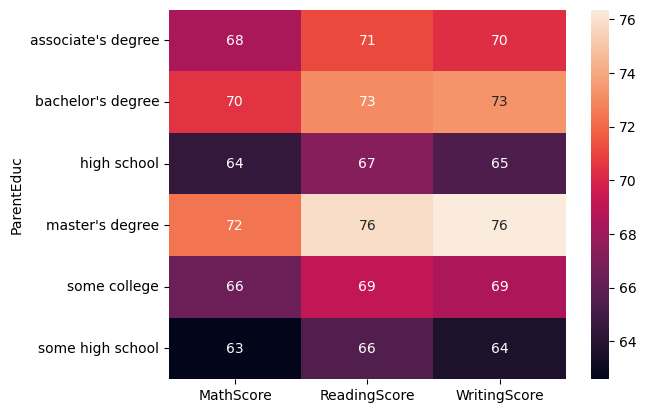

In [179]:
sns.heatmap(k,annot=True)
plt.show()

Based on the heatmap we can conclude that:

- **Highest Scores**: Students whose parents have a master's degree tend to have the highest scores across all subjects (Math, Reading, and Writing). Specifically, they have the highest mean scores in Math (72.34), Reading (75.83), and Writing (76.36).

- **Lowest Scores**: Students whose parents have some high school education tend to have the lowest scores across all subjects. They have the lowest mean scores in Math (62.58), Reading (65.51), and Writing (63.63).

Therefore, students whose parents have a master's degree are scoring the highest, while those with parents having some high school education are scoring the lowest. The level of parents' education appears to have a significant impact on students' academic performance, with higher levels of parental education correlating with higher student scores.

In [180]:
m=df.groupby("ParentMaritalStatus").agg({"MathScore" :'mean', "ReadingScore":"mean","WritingScore":'mean'})
m

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


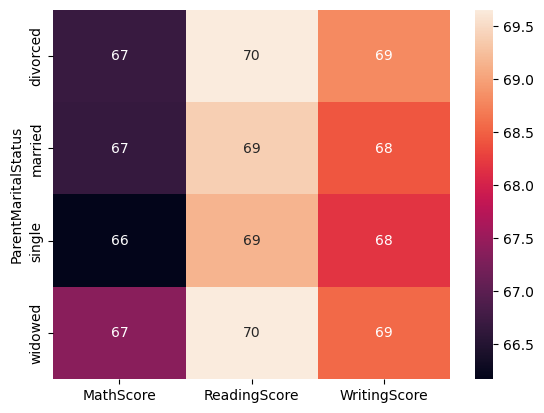

In [181]:
sns.heatmap(m,annot=True)
plt.show()


Based on the above data and heat map we can conclude that, students from divorced families tend to score slightly higher in reading and writing compared to students from other family types. However, there isn't a significant difference in math scores among students from different parental marital statuses.

## Exam Score Analysis

/var/folders/3r/s3ktbs4s4pj83k01s74csn540000gn/T/ipykernel_18775/1090184900.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/3r/s3ktbs4s4pj83k01s74csn540000gn/T/ipykernel_18775/1090184900.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


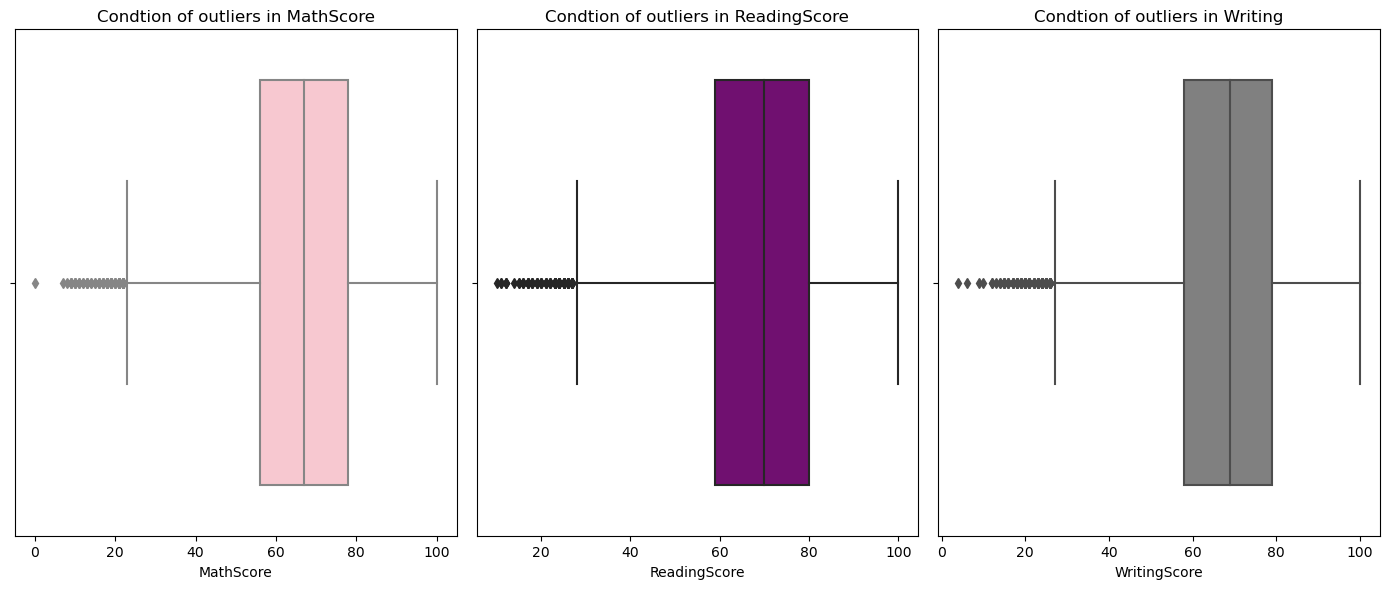

In [182]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(data=df, x="MathScore", color="pink")
plt.title("Condtion of outliers in MathScore")
plt.tight_layout()


plt.subplot(1,3,2)
sns.boxplot(data=df, x="ReadingScore", color="Purple")
plt.title("Condtion of outliers in ReadingScore")
plt.tight_layout()


plt.subplot(1,3,3)
sns.boxplot(data=df, x="WritingScore", color="Grey")
plt.title("Condtion of outliers in Writing")
plt.tight_layout()


From the provided box plot, it is evident that students tend to achieve lower marks in mathematics compared to their scores in writing and reading. This observation is supported by several factors: the minimum value, as depicted by the lower whisker of the box plot, appears to be notably lower for mathematics than for writing and reading. Additionally, a higher number of outliers are present in the lower range of scores in mathematics compared to both writing and reading, indicating that there are more instances of exceptionally low scores in mathematics relative to the other subjects.

## Distribution of Ethnic Group

In [183]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

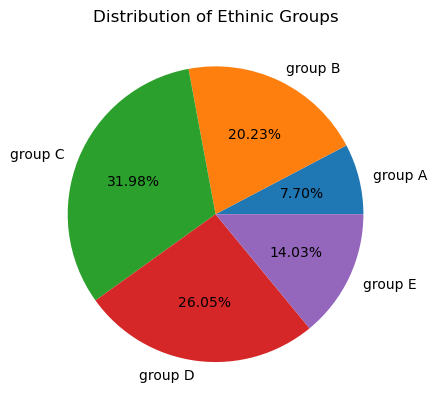

In [184]:
groupA=df.loc[df['EthnicGroup']=="group A"].count()
groupB=df.loc[df['EthnicGroup']=="group B"].count()
groupC=df.loc[df['EthnicGroup']=="group C"].count()
groupD=df.loc[df['EthnicGroup']=="group D"].count()
groupE=df.loc[df['EthnicGroup']=="group E"].count()

l=["group A","group B","group C","group D","group E"]
Pie =[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(Pie,labels=l ,autopct= "%1.2f%%")
plt.title("Distribution of Ethinic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

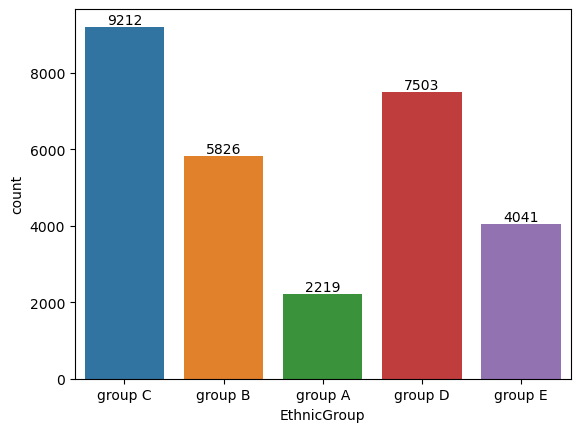

In [185]:
c =sns.countplot(data= df, x="EthnicGroup")
c.bar_label(c.containers[0])

## Correlation between students' number of siblings and student scores

In [186]:
r = df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
r

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.0,66.819449,69.547812,68.746515
1.0,66.473896,69.259097,68.245345
2.0,66.554934,69.472018,68.522533
3.0,66.719092,69.488159,68.650498
4.0,66.245495,69.144169,68.073444
5.0,66.630303,69.453788,68.282576
6.0,65.917219,68.801325,67.860927
7.0,67.615120,69.828179,68.986254


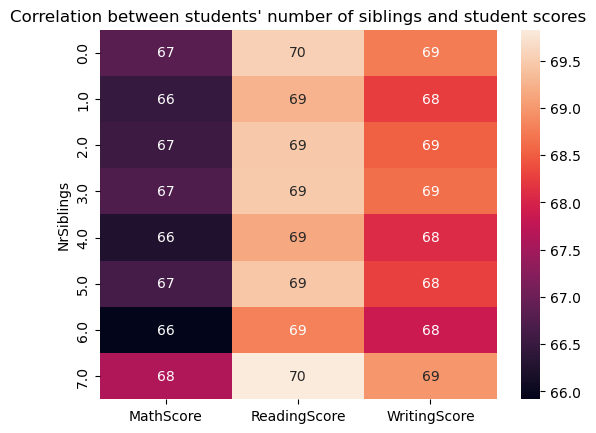

In [187]:

sns.heatmap(r,annot = True)
plt.title("Correlation between students' number of siblings and student scores")
plt.show()


In general, the number of siblings doesn't appear to have a significant impact on students' scores in math, reading, or writing. Across all number of siblings categories, the mean scores remain relatively consistent, with minor fluctuations observed. However, students with 7 siblings tend to have slightly higher scores in math and writing compared to those with fewer siblings, while those with 6 siblings have slightly lower scores across all subjects. Nonetheless, these variations are subtle, suggesting that the number of siblings alone may not be a decisive factor in determining students' academic performance.

# Test Preparation

In [188]:
print(df["TestPrep"].unique())

['none' nan 'completed']


In [189]:
df["TestPrep"]=df["TestPrep"].fillna('none')
df["TestPrep"].unique()

array(['none', 'completed'], dtype=object)

In [190]:
gb5=df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb5

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


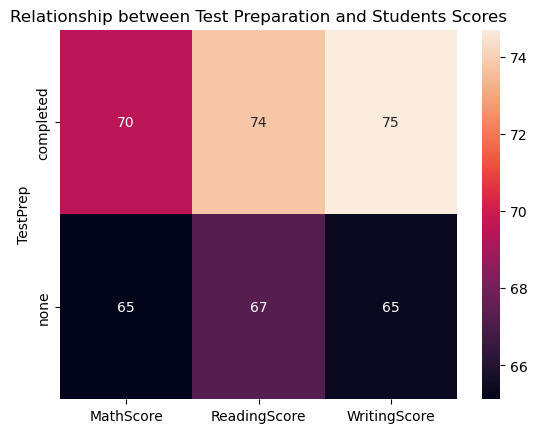

In [191]:
sns.heatmap(gb5,annot=True)
plt.title("Relationship between Test Preparation and Students Scores")
plt.show()

The summary indicates a notable relationship between test preparation and students' scores across all subjects. Students who completed test preparation courses tend to achieve significantly higher scores in math (69.55), reading (73.73), and writing (74.70) compared to those who didn't undergo preparation (math: 65.12, reading: 67.28, writing: 65.39). This suggests that completing test preparation positively influences academic performance across all subjects, highlighting the importance of adequate preparation in achieving higher scores.

## Relationship between Is Firstchild and the Scores

In [192]:
gb6=df.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb6

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.740646,69.542553,68.558484


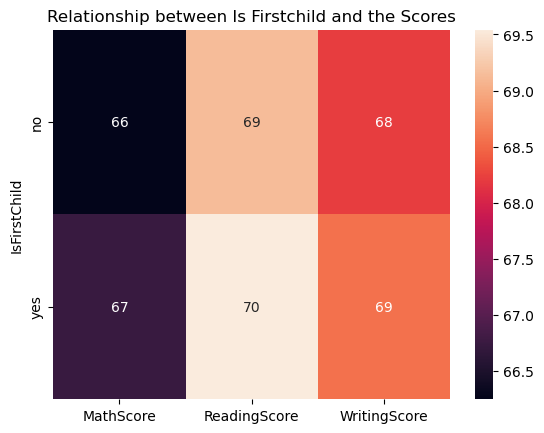

In [193]:
sns.heatmap(gb6,annot=True)
plt.title("Relationship between Is Firstchild and the Scores")
plt.show()


The summary reveals a slight disparity in scores between students who are first children and those who are not. Students who are not the first child tend to have slightly lower mean scores in math (66.25), reading (69.13), and writing (68.21) compared to their counterparts who are the first child (math: 66.74, reading: 69.54, writing: 68.56). While the differences are minimal, they suggest a subtle influence of birth order on academic performance, with first children showing slightly higher scores overall. However, further investigation may be warranted to understand the underlying factors contributing to these distinctions.

## Relationship between Lunch Type and Students Scores

In [194]:
gb7=df.groupby("LunchType").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb7

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716


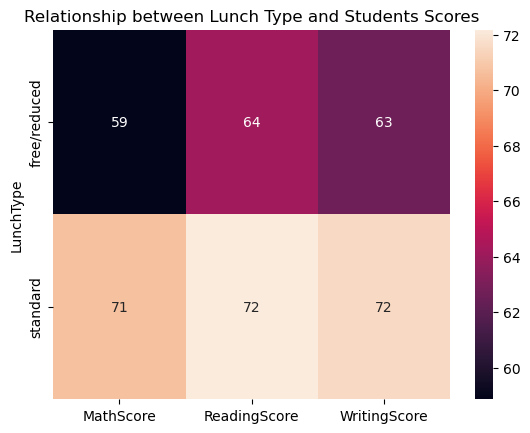

In [195]:
sns.heatmap(gb7,annot=True)
plt.title("Relationship between Lunch Type and Students Scores")
plt.show()

We can conclude from the heatmap that the scores appear to be higher for students with a standard lunch compared to those with a free/reduced lunch

## Relationship between Tranport Means and Students Scores

In [196]:
gb8=df.groupby("TransportMeans").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb8

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.674636,69.446206,68.492351


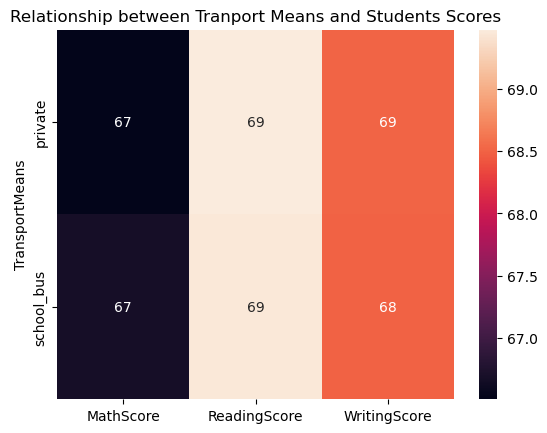

In [197]:
sns.heatmap(gb8,annot=True)
plt.title("Relationship between Tranport Means and Students Scores")
plt.show()

Based on heatmap we got, it appears that there is a relatively small difference in scores between students who use private transportation and those who use a school bus. Overall, students who use private transportation have slightly higher scores in Math, Reading, and Writing compared to students who take the school bus. However, the differences in scores between the two groups are not substantial. Further analysis may be needed to explore any potential factors influencing these results.

# THANK YOU !